In [2]:
!pip install numpy==1.20
!pip install sdv
%matplotlib inline 
%load_ext google.colab.data_table
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import joblib
from joblib import parallel_backend
from sklearn import preprocessing
from sdv.tabular import CTGAN,CopulaGAN
from sdv.evaluation import evaluate
import IPython
import warnings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
df1 = pd.read_csv('/content/gdrive/MyDrive/miRNA/IMTdatabase.csv',sep=';' , encoding='latin-1')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
df1.head()

,HC,Status,Idade,Sexo,PAS,PAD,FC,Septo,PP,DDFVE,DSFVE,Peso,Altura,ASC,IMC,MVE,FE,MVE17,MVEAltura,MVEASC,RWT,Geometria,DM,Glicose,CT,TG,HDL,LDL,Ureia,Creatinina,aciduric,statusAU,LDLox,mir185,logmir185,mirlet7,logmirlet7,mir30a,logmir30a,mir451,logmir451,mir92a,logmir92a,mir145,logmir145,dsveimt,ddveimt,IMT,StatusIMT,vari,Presenplaca,Placadir,Intdir,Meddir,AdvDir,PlcaEsq,Intesq,MedEsq,AdvEsq,Intima,media,adventicia,VAR00001,Tabagismo,DAC,IAM,AVC,IF,Diuretico,IECA,BRA,IEBRA,betabloq,BCC,Medicação,Antaaldost,agoalfacentral,agoalfaper,vasodilat,statinas,AAS,obesidade
0,10731748,1.0,67,2,113,65,63.0,8.0,8.0,41.0,27.0,53.0,158.0,1.525,21.23,97.338,63.6,44.727,28.308,63.837,0.390,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0857,-3.545,0.6713,-0.5750,9.2215,3.2050,8.0836,3.015,0.2457,-2.0250,0.0205,0.0312,0.842,2,1.0,1.0,1.0,0.256,0.475,0.541,1.0,0.318,0.635,0.468,0.2870,0.5550,0.5045,1.0,0,0,0,0,0.0,0,1,0,1,1,0,1,0,0.0,0,0.0,0,0,1
1,12181430,1.0,51,1,110,65,61.0,9.0,9.0,49.0,31.0,79.0,176.0,1.954,25.50,152.951,66.4,58.503,33.241,78.288,0.367,1.0,2.0,88.0,184.0,72.0,65.0,105.0,51.0,0.87,NaN,NaN,NaN,0.0461,-4.440,0.0620,-4.000,0.7605,-0.3950,14.2709,3.8350,10.3031,3.365,0.4780,-1.0650,0.0101,0.0160,0.496,1,1.0,0.0,0.0,0.177,0.424,0.420,0.0,0.173,0.217,0.275,0.1750,0.3205,0.3475,1.0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0.0,1,1,1
2,2873990,1.0,58,2,130,91,66.0,10.0,9.0,38.0,23.0,65.0,164.0,1.600,24.17,109.030,70.7,47.023,28.673,63.800,0.474,4.0,2.0,95.0,213.0,91.0,69.0,126.0,33.0,0.86,3.9,1.0,NaN,NaN,NaN,0.0007,-10.572,0.0823,-3.6025,0.3517,-1.5075,0.9314,-0.102,0.1389,-2.8475,0.0140,0.0231,0.531,1,1.0,0.0,0.0,0.199,0.304,0.281,0.0,0.195,0.364,0.367,0.1970,0.3340,0.3240,1.0,1,0,0,0,0.0,1,1,0,1,0,0,1,0,0.0,0,0.0,0,0,1
3,12248343,1.0,24,1,137,77,62.0,10.0,10.0,53.0,33.0,92.0,186.0,2.170,26.59,200.396,67.4,69.778,37.515,92.367,0.377,1.0,2.0,84.0,153.0,74.0,48.0,90.0,27.0,0.91,NaN,NaN,NaN,0.2045,-2.290,0.1326,-2.915,1.2767,0.3520,29.8570,4.9000,24.8470,4.635,3.4224,1.7750,0.0100,0.0161,0.532,1,1.0,0.0,0.0,0.209,0.309,0.351,0.0,0.239,0.306,0.643,0.2240,0.3075,0.4970,1.0,0,0,0,0,0.0,0,0,0,0,1,1,1,0,0.0,0,0.0,0,0,1
4,10968107,2.0,74,2,170,80,75.0,11.0,12.0,43.0,26.0,59.0,152.0,1.552,25.54,173.647,70.4,85.218,56.065,111.906,0.558,3.0,2.0,98.0,244.0,226.0,47.0,142.0,45.0,1.44,NaN,NaN,NaN,0.0172,-5.865,0.0698,-3.840,0.4248,-1.2350,11.5514,3.5300,11.1967,3.485,0.8497,-0.2350,0.0124,0.0205,0.534,1,1.0,1.0,1.0,0.202,0.271,0.337,1.0,0.243,0.352,0.332,0.2225,0.3115,0.3345,1.0,0,1,0,0,0.0,1,1,0,1,1,1,1,0,0.0,0,NaN,1,1,1


<AxesSubplot:xlabel='Status', ylabel='count'>

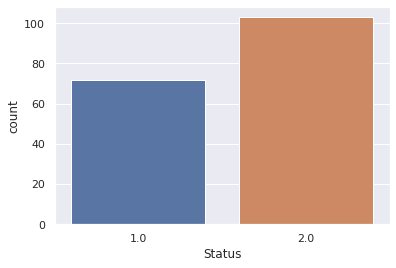

In [55]:
sns.countplot(x = 'Status', data=df1)

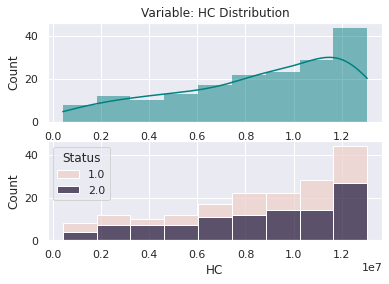

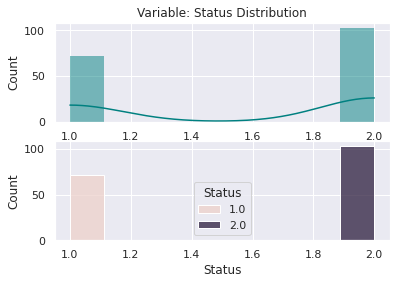

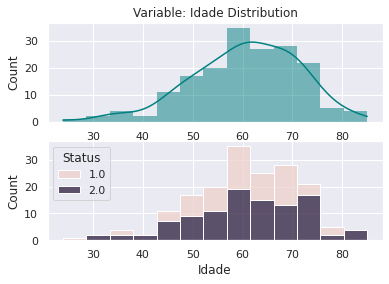

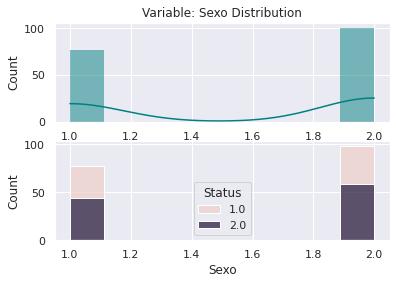

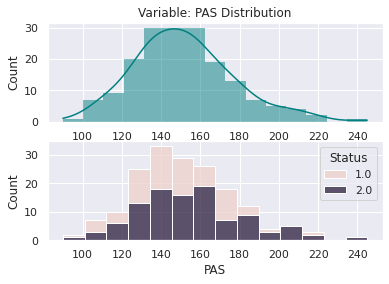

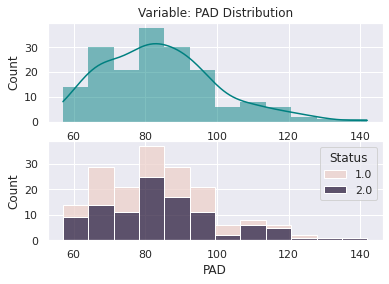

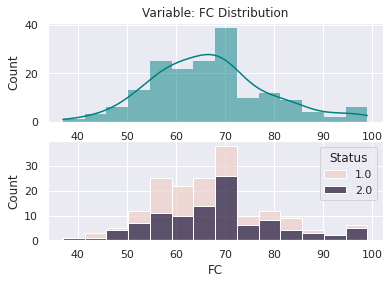

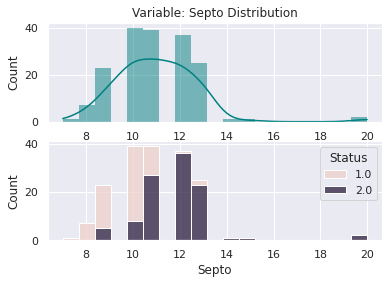

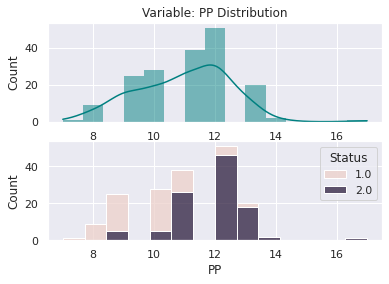

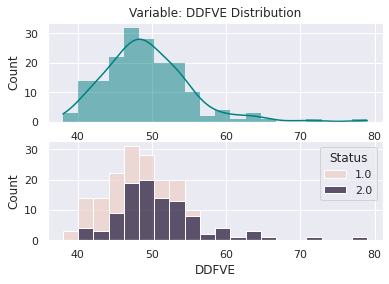

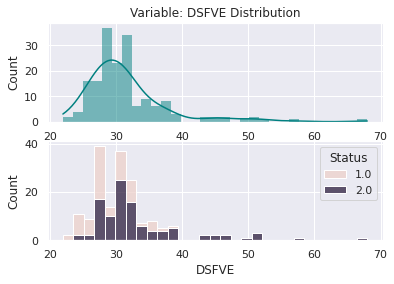

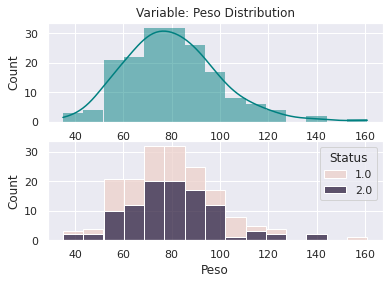

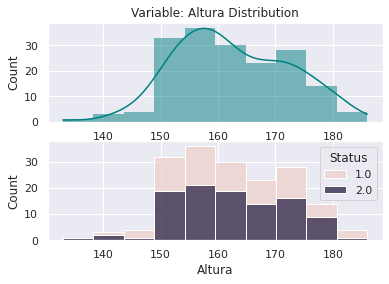

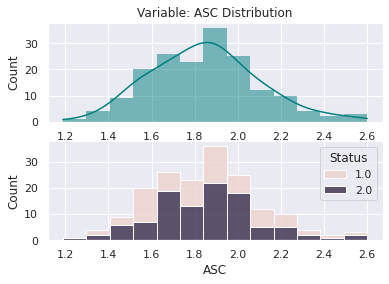

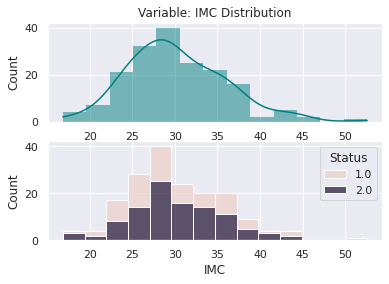

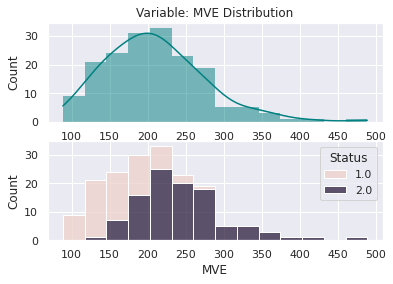

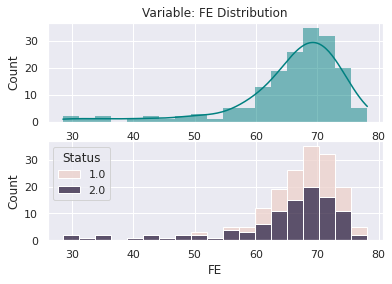

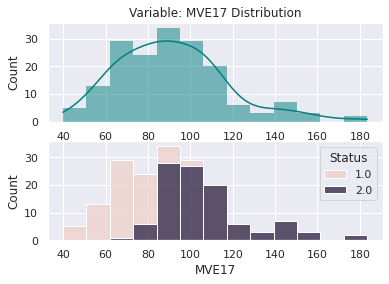

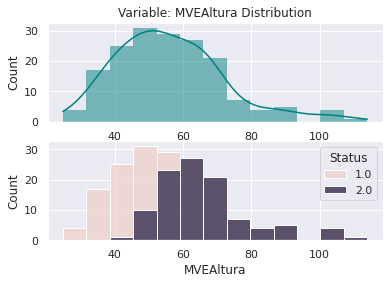

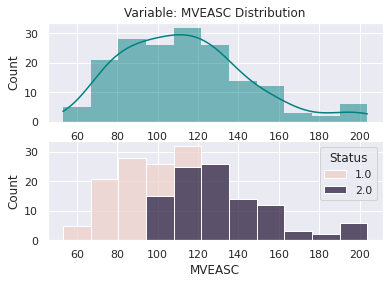

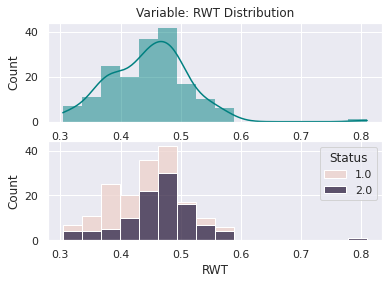

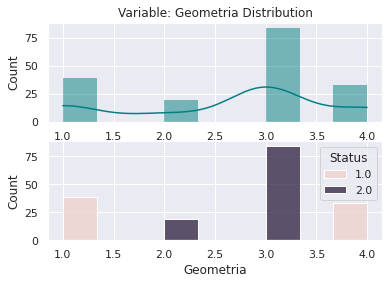

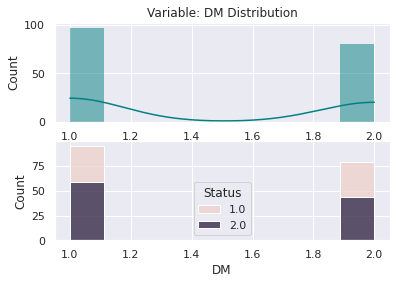

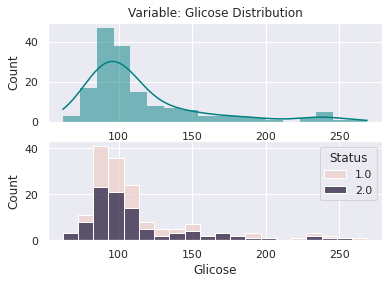

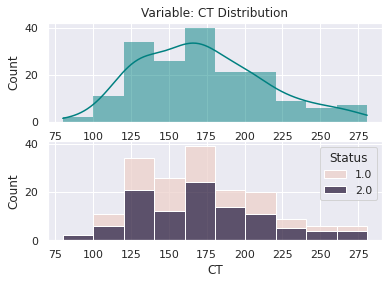

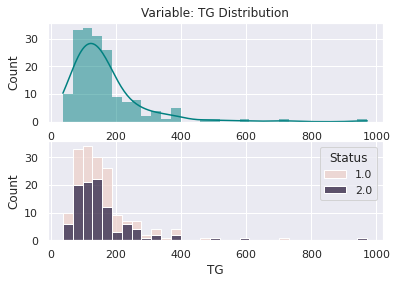

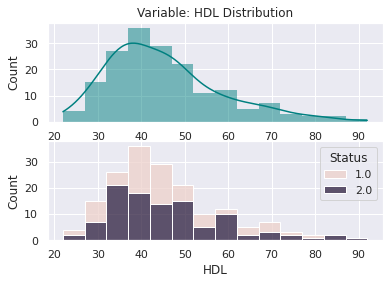

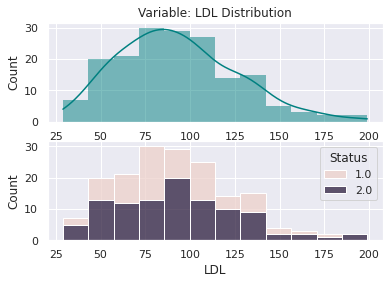

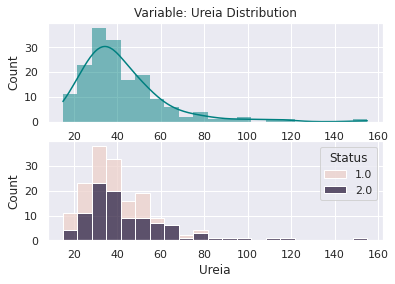

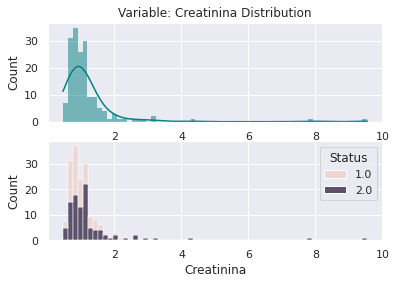

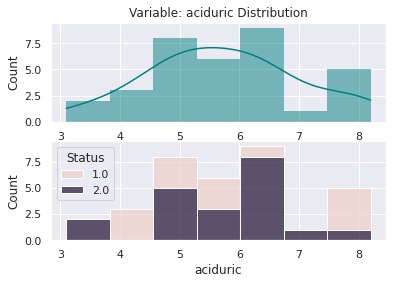

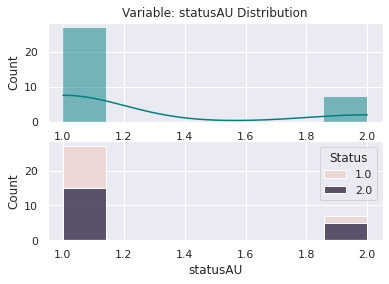

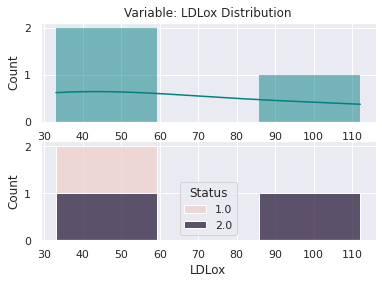

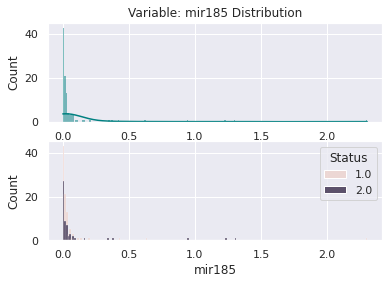

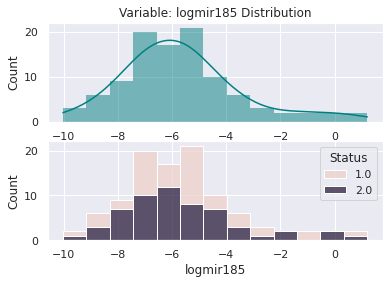

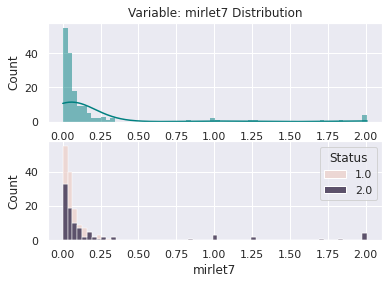

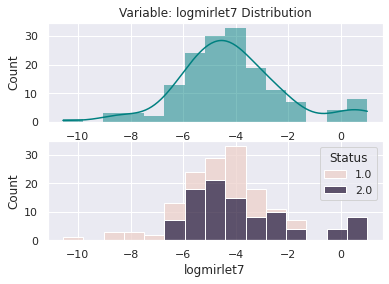

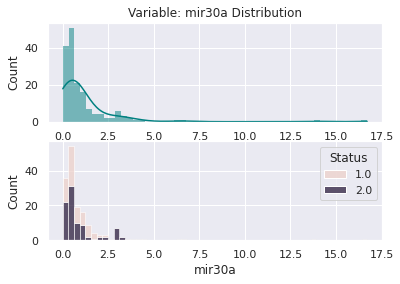

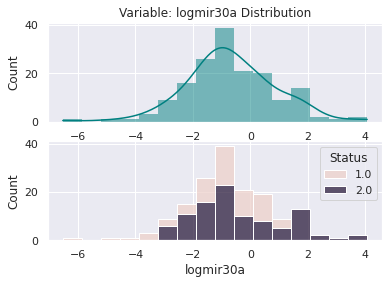

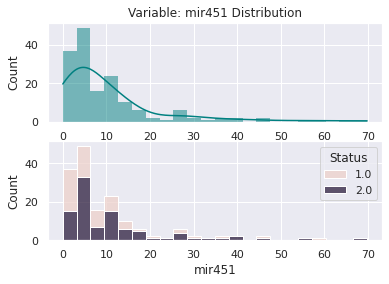

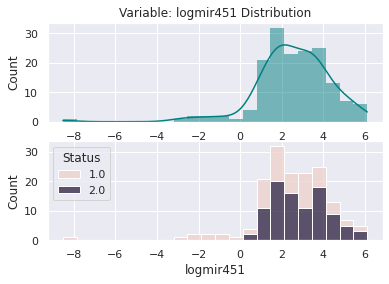

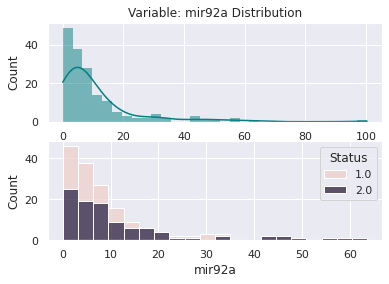

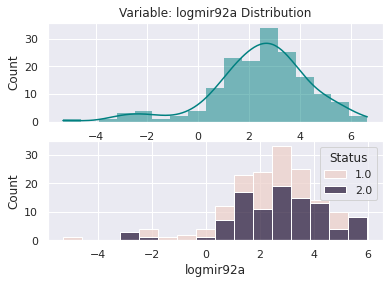

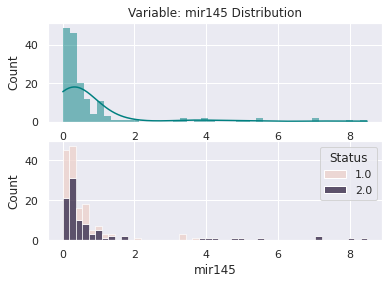

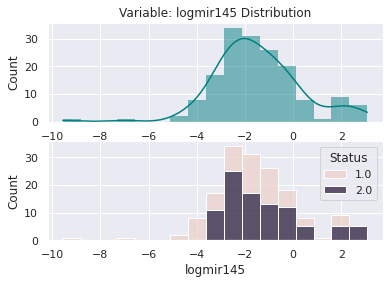

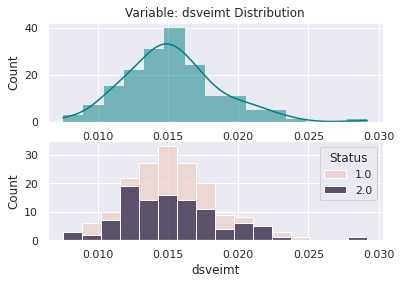

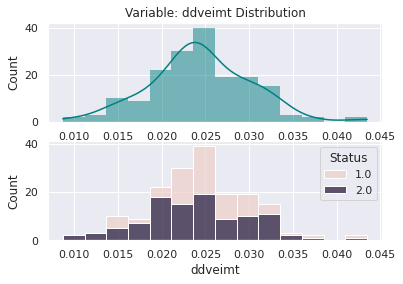

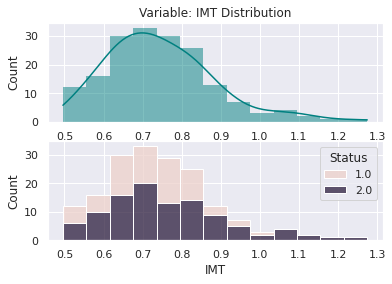

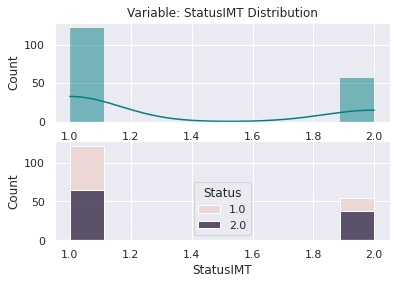

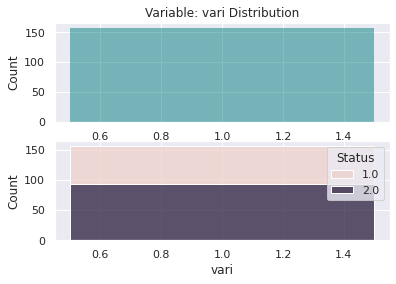

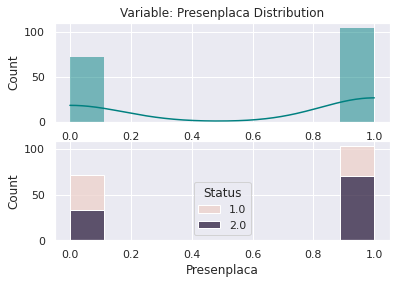

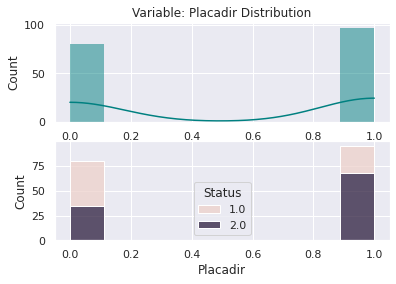

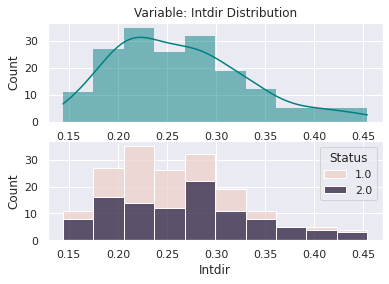

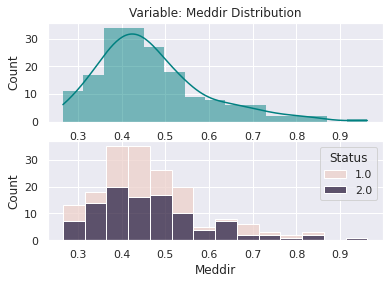

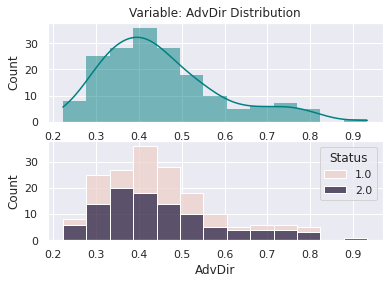

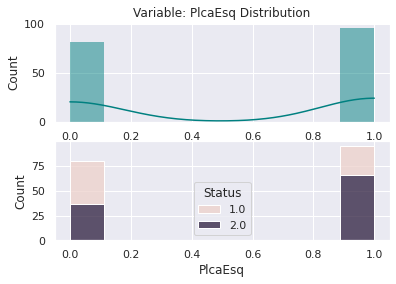

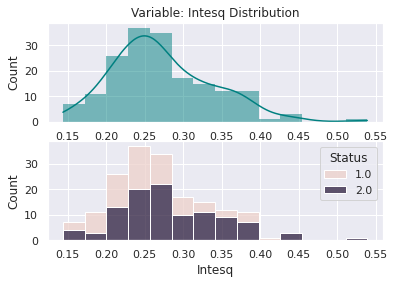

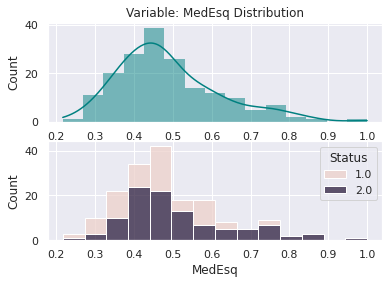

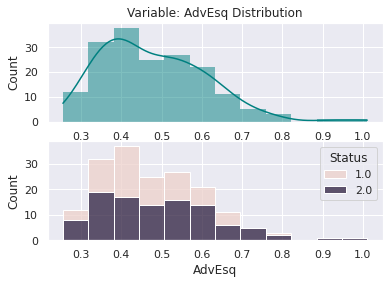

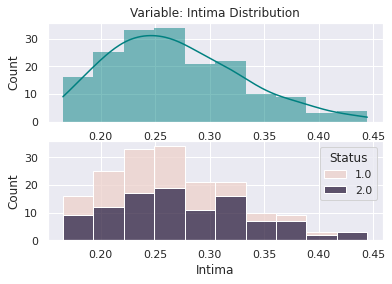

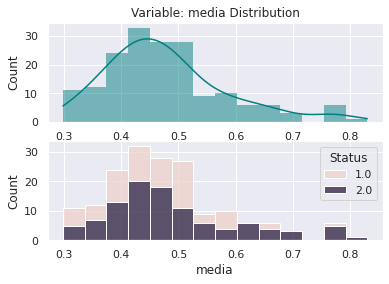

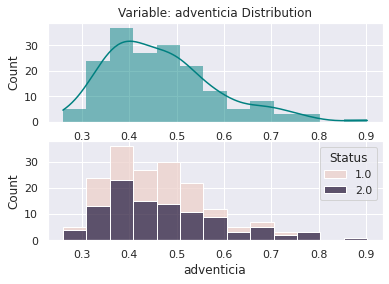

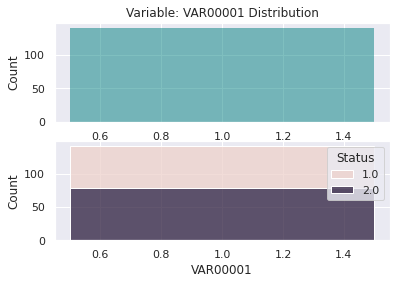

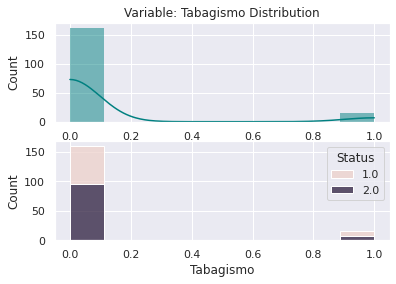

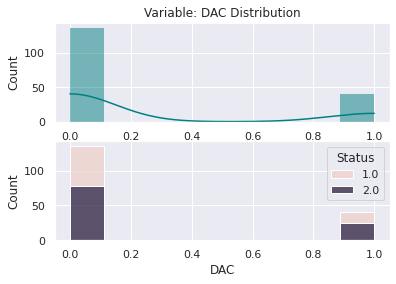

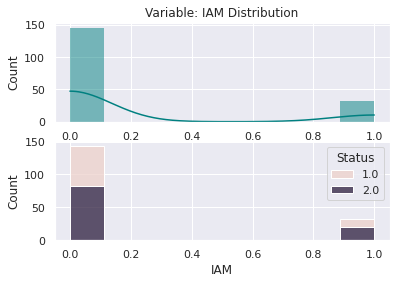

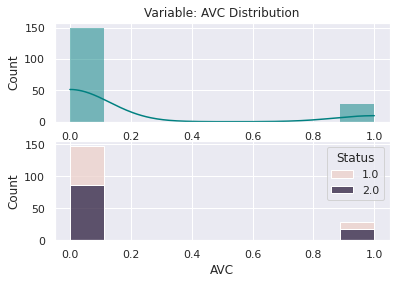

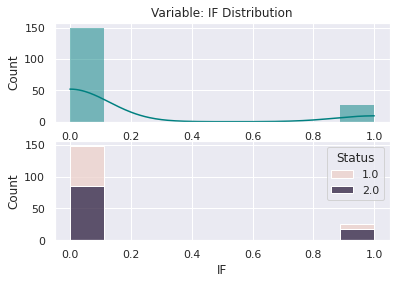

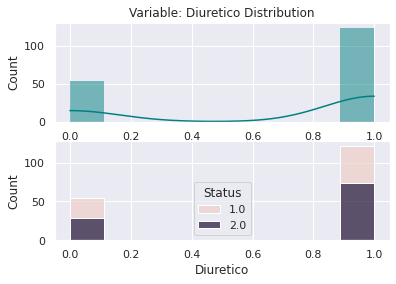

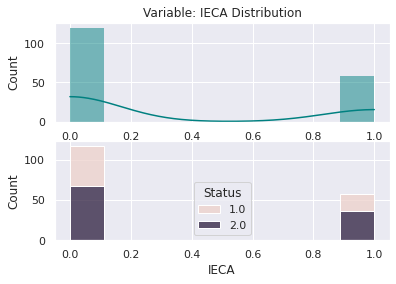

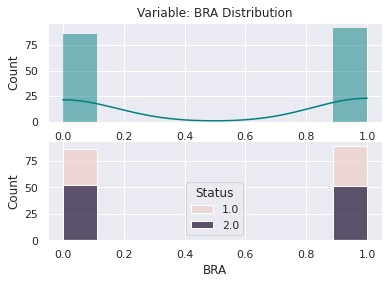

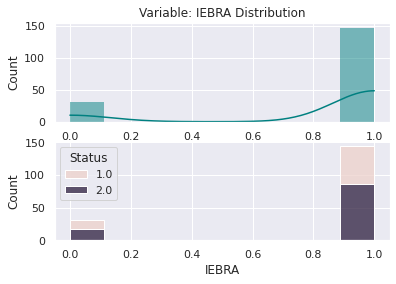

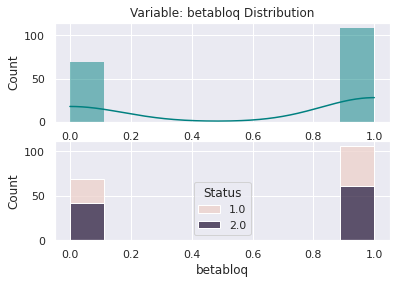

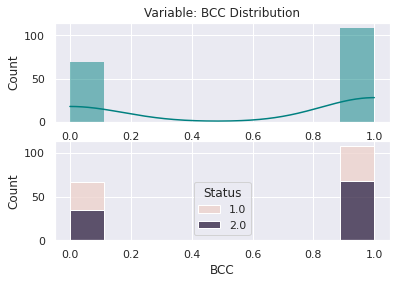

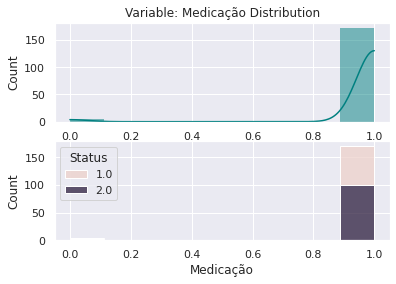

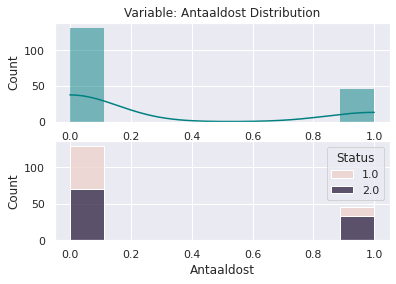

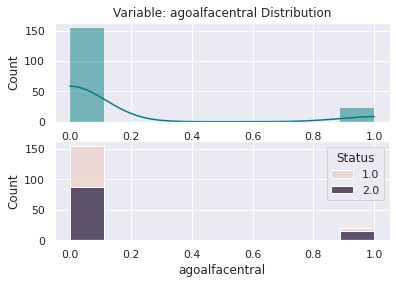

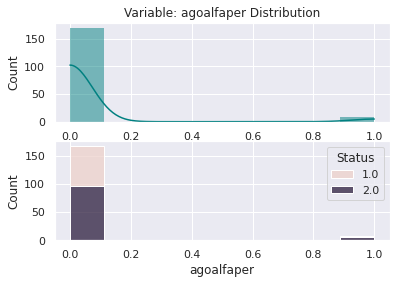

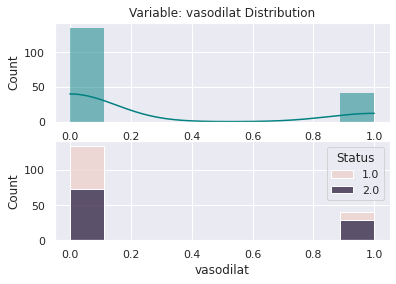

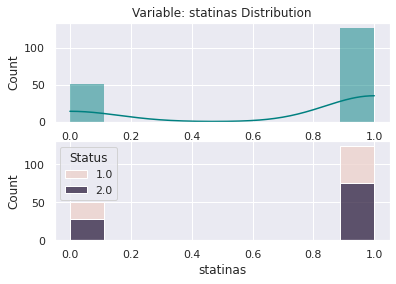

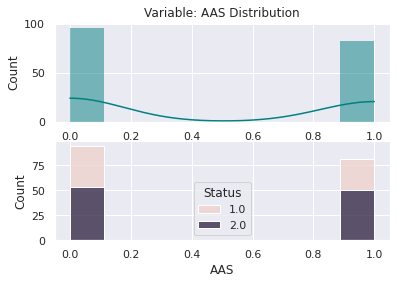

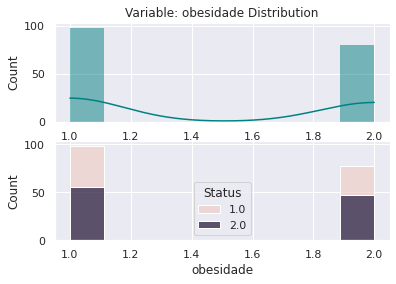

In [71]:

for col in df1:
    fig, axs = plt.subplots(2)
    axs[0].set_title('Variable: '+col+' Distribution')
    sns.histplot(data=df1[col],kde= True, linewidth=0, color="teal", ax=axs[0])
    sns.histplot(data=df1, x=col, hue="Status",multiple="stack" ,color="skyblue", ax=axs[1])
    
    plt.show()
    print("\n\n\n")

In [110]:
with parallel_backend('multiprocessing'):
  model = CopulaGAN(primary_key='HC',
                    epochs=1500,batch_size=20,log_frequency=True,verbose=True,embedding_dim=256,generator_lr=1e-6,generator_decay=1e-4,discriminator_lr=1e-6,discriminator_decay=1e-4,discriminator_steps=10)
  model.fit(df1)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:283: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  "minimize step, clipping to bounds", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different 

Epoch 1, Loss G:  0.9071,Loss D: -0.1676
Epoch 2, Loss G:  1.0699,Loss D: -0.2574
Epoch 3, Loss G:  0.9532,Loss D: -0.1789
Epoch 4, Loss G:  1.0155,Loss D: -0.2678
Epoch 5, Loss G:  1.0647,Loss D: -0.2988
Epoch 6, Loss G:  0.9374,Loss D: -0.3577
Epoch 7, Loss G:  1.0100,Loss D: -0.6355
Epoch 8, Loss G:  1.1327,Loss D: -0.5172
Epoch 9, Loss G:  1.0964,Loss D: -0.2908
Epoch 10, Loss G:  0.9472,Loss D: -0.8168
Epoch 11, Loss G:  1.1637,Loss D: -0.9380
Epoch 12, Loss G:  1.2851,Loss D: -0.9758
Epoch 13, Loss G:  1.2346,Loss D: -0.6844
Epoch 14, Loss G:  1.0229,Loss D: -1.1898
Epoch 15, Loss G:  1.4498,Loss D: -1.1812
Epoch 16, Loss G:  1.5884,Loss D: -1.2676
Epoch 17, Loss G:  1.5500,Loss D: -1.4177
Epoch 18, Loss G:  1.4165,Loss D: -1.3554
Epoch 19, Loss G:  1.6000,Loss D: -1.6485
Epoch 20, Loss G:  1.7771,Loss D: -1.5439
Epoch 21, Loss G:  1.6363,Loss D: -1.5480
Epoch 22, Loss G:  1.6747,Loss D: -1.7615
Epoch 23, Loss G:  1.9305,Loss D: -1.8164
Epoch 24, Loss G:  1.7824,Loss D: -1.7105
E

In [111]:
fake = model.sample(50)
fake.head()

,HC,Status,Idade,Sexo,PAS,PAD,FC,Septo,PP,DDFVE,DSFVE,Peso,Altura,ASC,IMC,MVE,FE,MVE17,MVEAltura,MVEASC,RWT,Geometria,DM,Glicose,CT,TG,HDL,LDL,Ureia,Creatinina,aciduric,statusAU,LDLox,mir185,logmir185,mirlet7,logmirlet7,mir30a,logmir30a,mir451,logmir451,mir92a,logmir92a,mir145,logmir145,dsveimt,ddveimt,IMT,StatusIMT,vari,Presenplaca,Placadir,Intdir,Meddir,AdvDir,PlcaEsq,Intesq,MedEsq,AdvEsq,Intima,media,adventicia,VAR00001,Tabagismo,DAC,IAM,AVC,IF,Diuretico,IECA,BRA,IEBRA,betabloq,BCC,Medicação,Antaaldost,agoalfacentral,agoalfaper,vasodilat,statinas,AAS,obesidade
0,0,1.0,62,2,90,65,65.0,14.0,NaN,43.0,NaN,94.2,152.0,NaN,25.78,NaN,71.51,55.432,53.640,80.746075,0.604,4.0,1.0,121.0,160.0,55.7,47.2,104.0,39.8,0.51,NaN,NaN,NaN,0.030209,NaN,NaN,-3.7283,1.4415,1.035142,3.1466,1.2545,0.8399,5.9481,0.9030,-1.0898,0.0144,0.0246,0.7134,2,1.0,1.0,0.0,0.352,0.410,0.319,1.0,0.221,0.312,0.591,0.2531,0.4422,0.3947,NaN,1,0,0,0,0.0,1,0,0,0,0,0,1,0,0.0,0,0.0,1,0,1
1,1,1.0,82,2,139,83,61.0,12.0,10.0,65.0,NaN,92.4,156.0,1.343284,NaN,171.406571,71.09,123.073,58.549,115.972807,0.480,2.0,2.0,81.0,184.0,122.4,26.2,174.0,40.8,1.04,NaN,NaN,NaN,0.905144,-5.6754,0.097230,-3.7502,0.6883,-1.932020,0.4970,4.6624,1.8349,-1.3543,0.5465,-5.8383,0.0130,0.0267,1.2566,1,1.0,0.0,1.0,0.219,0.451,0.261,1.0,0.268,0.363,0.728,0.1846,0.4774,0.3648,1.0,0,0,0,0,0.0,1,0,1,1,1,1,1,0,0.0,0,NaN,1,0,2
2,2,1.0,63,1,121,80,82.0,9.0,10.0,44.0,24.0,135.6,166.0,1.609820,23.88,131.477192,63.59,105.207,30.030,79.769669,0.522,1.0,1.0,85.0,NaN,126.5,22.0,116.0,55.3,1.05,NaN,NaN,NaN,0.058160,-3.7672,NaN,-1.7991,0.4248,NaN,1.2634,NaN,14.8354,-0.0661,NaN,1.1584,0.0139,NaN,0.6565,1,1.0,0.0,1.0,0.294,0.339,0.422,0.0,0.272,0.436,0.318,0.4443,0.4066,0.4170,NaN,0,1,0,0,0.0,1,0,1,1,1,0,1,0,0.0,0,0.0,1,0,2
3,3,1.0,50,2,133,63,70.0,10.0,11.0,59.0,26.0,73.5,175.0,NaN,NaN,198.416872,62.29,113.713,25.798,103.224762,0.481,1.0,1.0,82.0,204.0,251.9,NaN,75.0,25.7,0.64,NaN,NaN,NaN,0.100533,NaN,0.031924,-2.4602,0.8958,-1.797528,26.5266,3.3920,NaN,2.4206,1.3025,0.0066,0.0146,0.0222,1.2749,2,NaN,1.0,0.0,0.414,0.747,0.257,0.0,0.352,0.705,0.517,0.3128,0.4680,0.6431,1.0,0,1,0,0,0.0,1,0,1,1,1,0,1,1,0.0,0,0.0,1,0,1
4,4,2.0,37,2,101,108,NaN,11.0,8.0,55.0,26.0,60.6,154.0,2.444583,29.88,180.218150,34.85,179.756,71.440,135.935544,0.477,4.0,1.0,92.0,163.0,NaN,44.7,94.0,104.8,1.13,6.6,1.0,NaN,0.016472,-5.4412,0.000700,-4.1814,1.0411,-3.723440,3.0857,3.8560,0.7613,3.0105,0.0319,-3.3395,0.0149,0.0202,0.8186,1,1.0,0.0,0.0,NaN,0.458,0.223,0.0,0.229,0.840,0.406,0.1877,0.5542,0.5515,1.0,0,1,0,0,0.0,1,1,0,1,1,1,1,0,0.0,0,1.0,1,1,1


In [112]:
from sdv.sampling import Condition
condition = Condition({'StatusIMT': 2 }, num_rows=5)

In [113]:
newdata = model.sample_conditions(conditions=[condition])

Sampling conditions: 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]


In [114]:
newdata

,HC,Status,Idade,Sexo,PAS,PAD,FC,Septo,PP,DDFVE,DSFVE,Peso,Altura,ASC,IMC,MVE,FE,MVE17,MVEAltura,MVEASC,RWT,Geometria,DM,Glicose,CT,TG,HDL,LDL,Ureia,Creatinina,aciduric,statusAU,LDLox,mir185,logmir185,mirlet7,logmirlet7,mir30a,logmir30a,mir451,logmir451,mir92a,logmir92a,mir145,logmir145,dsveimt,ddveimt,IMT,StatusIMT,vari,Presenplaca,Placadir,Intdir,Meddir,AdvDir,PlcaEsq,Intesq,MedEsq,AdvEsq,Intima,media,adventicia,VAR00001,Tabagismo,DAC,IAM,AVC,IF,Diuretico,IECA,BRA,IEBRA,betabloq,BCC,Medicação,Antaaldost,agoalfacentral,agoalfaper,vasodilat,statinas,AAS,obesidade
0,3,2.0,58,1,156,91,56.0,11.0,13.0,56.0,37.0,66.3,163.0,2.213436,25.86,263.892987,77.24,153.045,81.466,138.618901,0.327,3.0,1.0,209.0,249.0,62.1,34.0,92.0,31.3,1.18,5.7,1.0,NaN,0.065657,-5.9266,0.052893,-2.8510,0.0760,0.483750,1.3267,2.1840,11.7299,1.5915,0.4347,-0.6829,0.0158,0.0283,0.6851,2,NaN,1.0,0.0,0.272,0.961,0.509,1.0,0.215,0.491,0.751,0.2647,0.3610,0.6615,NaN,0,0,0,0,0.0,1,0,1,1,0,1,1,0,0.0,0,0.0,1,0,1
1,4,2.0,77,2,245,104,48.0,12.0,7.0,48.0,34.0,81.0,NaN,1.605986,35.33,346.199181,NaN,72.252,24.887,80.271653,0.439,4.0,1.0,100.0,123.0,76.4,47.2,50.0,37.1,0.84,NaN,NaN,NaN,NaN,-6.0348,0.038206,-3.4439,0.7909,-1.415104,NaN,3.0948,34.6433,2.2551,NaN,-1.4694,0.0170,0.0208,0.6914,2,1.0,0.0,0.0,0.263,0.578,0.375,0.0,0.146,0.407,0.560,NaN,0.5858,0.5099,1.0,0,0,0,0,0.0,0,0,0,1,1,1,0,0,0.0,0,0.0,1,1,1
2,13,2.0,66,2,220,87,84.0,10.0,10.0,49.0,35.0,98.4,146.0,1.629163,37.49,212.544250,70.30,93.687,61.878,101.127556,0.552,4.0,1.0,106.0,154.0,388.1,49.9,63.0,NaN,0.92,NaN,NaN,NaN,0.097622,-5.0971,0.087985,NaN,0.0441,-0.336834,1.0632,4.8025,6.7686,0.4855,0.6070,-9.2076,0.0131,0.0202,0.9273,2,1.0,1.0,1.0,0.194,0.454,NaN,1.0,NaN,0.563,0.737,0.3560,0.3678,0.5221,NaN,0,0,0,0,0.0,1,0,1,1,1,0,1,0,0.0,0,0.0,1,0,2
3,15,2.0,49,1,173,85,47.0,20.0,8.0,77.0,NaN,104.5,168.0,2.368851,33.30,171.713006,68.59,NaN,30.418,87.684676,0.463,2.0,2.0,79.0,99.0,587.2,60.7,53.0,102.8,1.64,NaN,NaN,62.73,0.125350,NaN,0.105594,-5.6743,NaN,NaN,18.3589,3.8372,13.7910,2.8894,0.0197,-5.0920,0.0142,0.0301,0.9374,2,1.0,0.0,1.0,0.214,0.444,0.291,0.0,0.539,0.523,0.607,0.1831,0.3122,0.3505,1.0,0,0,0,0,0.0,1,0,1,1,0,1,1,1,0.0,0,0.0,1,1,2
4,19,NaN,56,1,107,77,52.0,12.0,13.0,57.0,39.0,156.2,172.0,1.780792,27.12,268.455846,62.29,118.791,62.623,179.312163,NaN,3.0,2.0,161.0,127.0,57.1,53.1,126.0,34.6,1.40,NaN,1.0,NaN,NaN,-9.9177,0.285984,-1.5969,0.1676,-3.354429,2.8648,NaN,5.7828,NaN,1.0108,-3.9526,0.0148,0.0201,0.5497,2,1.0,1.0,1.0,0.298,0.704,0.524,1.0,0.355,0.458,0.583,NaN,0.4368,0.3744,1.0,0,1,0,0,0.0,1,0,1,1,1,1,1,0,0.0,0,0.0,1,1,2


In [115]:
evaluate(df1, fake,  metrics=['CSTest', 'KSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,NaN,NaN,0.0,1.0,MAXIMIZE,"Cannot find fields of types ('boolean', 'categ..."
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.857912,0.857912,0.0,1.0,MAXIMIZE,None


In [116]:
fake.to_csv('out.csv', index=False, header=True)  

In [118]:
newdata.to_csv('statu2.csv', index=False, header=True)  

In [117]:
#report1 = sv.compare([df1,'Real'],[fake,'Fake'])
#report1.show_html('report1.html',open_browser=False,layout='vertical')
#IPython.display.HTML('report1.html')